In [28]:
import datetime as dt
from pytz import timezone
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import HTML
from money_squirrel.bin import utils

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

COINS = utils.load_config("coins")

def display_all(df):
    return HTML(df.to_html())

2017-06-26 05:53:15,738|money_squirrel.bin.utils|INFO|Loading JSON from /Users/ravdek/code/money_squirrel/money_squirrel/config/coins.json


In [63]:
gdax_price = utils.query_pg("select * from gdax_api_quote")

2017-06-27 16:19:54,364|money_squirrel.bin.utils|INFO|Loading JSON from /Users/ravdek/code/money_squirrel/money_squirrel/config/postgres.json
2017-06-27 16:19:54,365|money_squirrel.bin.utils|INFO|Connecting to postgres DB @ localhost
2017-06-27 16:19:54,368|money_squirrel.bin.utils|INFO|Executing query:

select * from gdax_api_quote



In [64]:
gdax_price.head()

,id,product_id,granularity,dt,low,high,open,close,volume
0,1,BTC-USD,20,2017-06-25 23:39:20-07:00,2489.36,2489.71,2489.47,2489.36,4.232061
1,2,BTC-USD,20,2017-06-25 23:38:40-07:00,2488.17,2489.96,2488.17,2489.96,0.102200
2,3,BTC-USD,20,2017-06-25 23:38:20-07:00,2486.56,2489.96,2487.47,2489.96,2.362538
3,4,BTC-USD,20,2017-06-25 23:38:00-07:00,2486.24,2489.97,2486.24,2489.97,4.472527
4,5,BTC-USD,20,2017-06-25 23:37:40-07:00,2486.11,2487.67,2486.11,2486.16,2.713689


In [65]:
gdax_price['granularity'].value_counts()

60    557643
20        43
Name: granularity, dtype: int64

In [61]:
gdax_price.loc[0, 'dt'].__class__

pandas.tslib.Timestamp

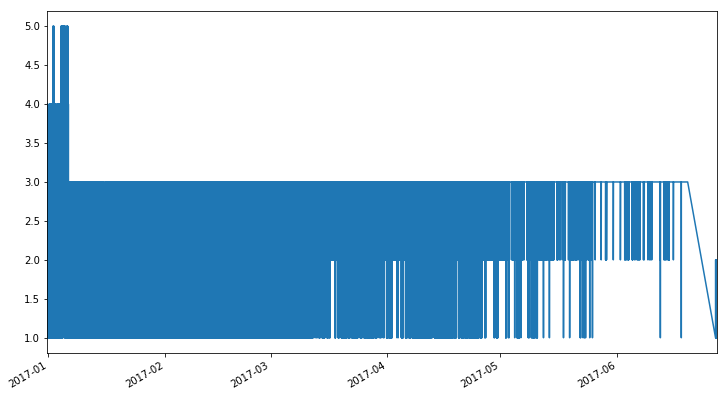

In [66]:
gdax_price.loc[gdax_price['granularity']==60, 'dt'].value_counts().plot()

In [37]:
gdax_price.loc[gdax_price['granularity']==60, 'dt'].max().replace(tzinfo=timezone('UTC'))

datetime.datetime(2017, 4, 11, 9, 39, tzinfo=<UTC>)

In [53]:
gdax_price.dt.isnull().value_counts()

False    554735
Name: dt, dtype: int64

In [54]:
gdax_price.product_id.value_counts()

BTC-USD    234963
ETH-USD    205784
LTC-USD    113988
Name: product_id, dtype: int64